---
title: "走入 Pytorch 的世界"
format:
  revealjs:
    theme: default
    chalkboard: true
fontsize: 18pt
scrollable: true
---

## 學習地圖

我們將介紹 PyTorch，這篇筆記並非面面俱到。如果您有任何疑問， 文件和 Google 都是您的好幫手。

* PyTorch 基礎：張量、運算、NumPy 對照

* 自動微分 (Autograd)：梯度計算的三種方法

* 線性回歸：從數學公式到程式實作

* PyTorch 訓練骨架：`Forward` → `Loss` → `Backward` → `Update`

* 進一步延伸：用 `nn.Module`、`DataLoader`、`nn.Linear` 改寫

---

## 匯入套件 

In [1]:
#| echo: true  # 顯示程式碼
#| output: true # 顯示輸出

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

# 匯入 3D 繪圖工具
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# 設定隨機種子，確保結果可重現 (PyTorch 與 NumPy 各自獨立)
torch.manual_seed(446)
np.random.seed(446)

# 自動判斷裝置是否有支援 GPU，如果有就使用 CUDA，否則使用 CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
print("Pytorch 版本: ", torch.__version__)
print("CUDA 版本: ", torch.version.cuda)
print("cuDNN 版本: ", torch.backends.cudnn.version())
print("是否支援 CUDA: ", torch.cuda.is_available())

Pytorch 版本:  2.7.1
CUDA 版本:  None
cuDNN 版本:  None
是否支援 CUDA:  False


## 張量（Tensor）與 NumPy 的關係

在科學計算中，**PyTorch** 可以視為與 **NumPy** 類似的套件，它同樣提供高效的矩陣與數值運算功能。不同的是，PyTorch 的基本資料結構是 **張量（Tensor）**，而 NumPy 的基本資料結構是 **多維陣列（ndarray）**。  

在概念上，PyTorch 的張量就像是延伸版的 NumPy 陣列，並且支援 GPU 加速與自動微分。  

---

## 張量的階數（Rank）

張量可以被視為一種「多階（rank）數組」，對應數學中不同的資料形式：  

- **純量（Scalar，0 階張量）**：單一數值，例如 `1`、`2.5`、`13/6`  
- **向量（Vector，1 階張量）**：一維數列，例如 `[1, 0]`、`[1, 1, 2.5, 3.4]`  
- **矩陣（Matrix，2 階張量）**：二維數列，例如 `[[1, 5], [3, 5]]`  
- **高階張量（Tensor，rank > 2）**：更高維度的資料結構，例如三維的影像資料或四維的影片資料  

<p align="center">
  <img src="https://drek4537l1klr.cloudfront.net/cai/HighResolutionFigures/figure_B-1.png" width="400" height="300" />
</p>

> 圖片來源：[Deep Learning with JavaScript, Manning Publications](https://livebook.manning.com/book/deep-learning-with-javascript)

---


In [3]:
#| echo: true  # 顯示程式碼
#| output: true # 顯示輸出

#------------------------------
# 1. 純量 (Scalar)
#------------------------------
print("=== Scalar (純量) ===")
a_py = 1.3   # 使用 Python 定義純量
print("Python scalar:", a_py)

a_torch = torch.tensor(1.3)  # 使用 PyTorch 定義純量
print("Torch scalar:", a_torch)
print()


#------------------------------
# 2. 向量 (Vector) 與 NumPy / PyTorch 的比較
#------------------------------
print("=== Vector (向量) ===")
x_numpy = np.array([0.1, 0.2, 0.3])          # NumPy 定義向量
x_torch = torch.tensor([0.1, 0.2, 0.3])      # PyTorch 定義向量
print("NumPy vector:", x_numpy)
print("Torch vector:", x_torch)
print()


#------------------------------
# 3. NumPy 與 PyTorch 的轉換
#------------------------------
print("=== NumPy ↔ PyTorch 轉換 ===")
print("From NumPy to Torch:", torch.from_numpy(x_numpy))
print("From Torch to NumPy:", x_torch.numpy())
print()


#------------------------------
# 4. 常見函數 (Functions)
#------------------------------
print("=== 常見函數 ===")
print("Norm (NumPy):", np.linalg.norm(x_numpy))
print("Norm (Torch):", torch.norm(x_torch))
print()


#------------------------------
# 5. 建立不同維度的張量
#------------------------------
print("=== 不同維度的張量 ===")

# (0 階) 純量
a = torch.rand(1)
print("0D Scalar (隨機數):\n", a)

# (1 階) 向量
b = torch.zeros((2,))
print("1D Vector (零向量):\n", b)

# (2 階) 矩陣
c = torch.tensor([[2.0], [4.0]])
print("2D Column Vector (行向量):\n", c)

A = torch.tensor([[1., 2.], [3., 4.]])
print("2D Matrix (矩陣):\n", A)

# (3 階) 三維張量
B = torch.tensor([[[1,2],[3,4]], [[5,6],[7,8]]])
print("3D Tensor:\n", B)


=== Scalar (純量) ===
Python scalar: 1.3
Torch scalar: tensor(1.3000)

=== Vector (向量) ===
NumPy vector: [0.1 0.2 0.3]
Torch vector: tensor([0.1000, 0.2000, 0.3000])

=== NumPy ↔ PyTorch 轉換 ===
From NumPy to Torch: tensor([0.1000, 0.2000, 0.3000], dtype=torch.float64)
From Torch to NumPy: [0.1 0.2 0.3]

=== 常見函數 ===
Norm (NumPy): 0.37416573867739417
Norm (Torch): tensor(0.3742)

=== 不同維度的張量 ===
0D Scalar (隨機數):
 tensor([0.2010])
1D Vector (零向量):
 tensor([0., 0.])
2D Column Vector (行向量):
 tensor([[2.],
        [4.]])
2D Matrix (矩陣):
 tensor([[1., 2.],
        [3., 4.]])
3D Tensor:
 tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])


## Python List vs NumPy ndarray vs PyTorch Tensor

| 類型 | 數學概念 | Python | NumPy | PyTorch |
|------|----------|--------|-------|---------|
| **純量 (Scalar, 0D)** | 單一數值 | `a = 1.3` | `a_np = np.array(1.3)` | `a_torch = torch.tensor(1.3)` |
| **向量 (Vector, 1D)** | 一維陣列 | `v = [1, 2, 3]` | `v_np = np.array([1, 2, 3])` | `v_torch = torch.tensor([1, 2, 3])` |
| **矩陣 (Matrix, 2D)** | 二維陣列 | `M = [[1, 2], [3, 4]]` | `M_np = np.array([[1, 2], [3, 4]])` | `M_torch = torch.tensor([[1, 2], [3, 4]])` |
| **高階張量 (Tensor, 3D 以上)** | 多維陣列 | `[[[1,2],[3,4]], [[5,6],[7,8]]]` | `T_np = np.array([[[1,2],[3,4]], [[5,6],[7,8]]])` | `T_torch = torch.tensor([[[1,2],[3,4]], [[5,6],[7,8]]])` |

---

| 資料結構 | 本質 | 是否有 Shape | 是否有 Dtype | 適合數學運算 | 額外功能 |
|----------|------|--------------|--------------|--------------|----------|
| **Python list** | 任意物件的集合 (巢狀可模擬多維) | ❌ 沒有 `.shape` | ❌ 沒有 `.dtype` | ❌ 不適合 | 無 |
| **NumPy ndarray** | 規則的多維陣列 | ✅ `.shape` | ✅ `.dtype` | ✅ 適合 | 提供大量數值運算函數 |
| **PyTorch Tensor** | 規則的多維陣列 (深度學習優化) | ✅ `.shape` | ✅ `.dtype` | ✅ 適合 | GPU 加速、自動微分 |

---

## 張量的重要屬性

在 **PyTorch** 中，張量（Tensor）有三個最重要的屬性：

1. **形狀 (Shape)**  
   - 張量的維度與大小  
   - 對應屬性：`.shape`

2. **型別 (Dtype)**  
   - 張量內部數值的資料型態，例如 `float32`、`int64`  
   - 對應屬性：`.dtype`

3. **值 (Value)**  
   - 張量實際存放的數值  
   - 可以直接印出，或使用 `.numpy()` 方法轉換為 NumPy 陣列後查看  


In [4]:
#| echo: true  # 顯示程式碼
#| output: true # 顯示輸出


# 查看矩陣A的形狀、類型和值
print(A.shape)      # 輸出(2, 2)，即矩陣的長和寬均為2
print(A.dtype)      # 輸出<dtype: 'float64'>

# 張量的 numpy() 方法是將張量的值轉換為一個 NumPy 數組。
print(A.numpy())    # 輸出[[1. 2.]
                    #      [3. 4.]]

torch.Size([2, 2])
torch.float32
[[1. 2.]
 [3. 4.]]


## 張量的重塑 (Reshape)

在 **PyTorch** 中，我們可以使用 `Tensor.view()` 方法來 **重塑張量 (reshape)**，其功能類似於 NumPy 的 `reshape()`。

### 使用方式
```python
Y = X.view(new_shape)
```

---


In [5]:
#| echo: true  # 顯示程式碼
#| output: true # 顯示輸出

#------------------------------
# Example 1
#------------------------------
print("=== Example 1 ===")

# 建立一個 2x3 的張量
X = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])

print("原始張量 X:")
print(X)
print("Shape:", X.shape)

# 重塑為 3x2
Y = X.view(3, 2)
print("\n重塑後 Y (3x2):")
print(Y)
print("Shape:", Y.shape)

# 使用 -1 自動推斷
Z = X.view(-1, 2)  # 自動計算出 (3, 2)
print("\n自動推斷 Z (-1, 2):")
print(Z)
print("Shape:", Z.shape)

=== Example 1 ===
原始張量 X:
tensor([[1, 2, 3],
        [4, 5, 6]])
Shape: torch.Size([2, 3])

重塑後 Y (3x2):
tensor([[1, 2],
        [3, 4],
        [5, 6]])
Shape: torch.Size([3, 2])

自動推斷 Z (-1, 2):
tensor([[1, 2],
        [3, 4],
        [5, 6]])
Shape: torch.Size([3, 2])


In [6]:
#| echo: true  # 顯示程式碼
#| output: true # 顯示輸出

#------------------------------
# Example 2
#------------------------------
print("=== Example 2 ===")

# 假設我們有 10000 張 3x28x28 的影像 (NCHW 格式)
N, C, W, H = 10000, 3, 28, 28
X = torch.randn((N, C, W, H))  # [批次大小, 通道數, 寬, 高]

print("原始張量 X 的形狀:")
print(X.shape)   # (10000, 3, 28, 28)

# 將影像展平成 (784 = 28*28)
X_flat = X.view(N, C, 784)
print("\n展平成 (N, C, 784):")
print(X_flat.shape)  # (10000, 3, 784)

# 使用 -1 自動推斷批次大小
X_auto = X.view(-1, C, 784)
print("\n自動推斷批次大小 (-1, C, 784):")
print(X_auto.shape)  # (10000, 3, 784)


=== Example 2 ===
原始張量 X 的形狀:
torch.Size([10000, 3, 28, 28])

展平成 (N, C, 784):
torch.Size([10000, 3, 784])

自動推斷批次大小 (-1, C, 784):
torch.Size([10000, 3, 784])


## PyTorch 是一台計算機

在 **PyTorch** 中，我們可以透過各種運算 (Operations) 來處理張量。  
給定兩個矩陣 $A$ 和 $B$：

$$
A = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}, \qquad
B = \begin{bmatrix} 5 & 6 \\ 7 & 8 \end{bmatrix}
$$

我們來試試 **矩陣加法**與**矩陣乘法**。

In [7]:
#| echo: true  # 顯示程式碼
#| output: true # 顯示輸出

# 定義兩個 2x2 矩陣
A = torch.tensor([[1.0, 2.0],
                  [3.0, 4.0]])

B = torch.tensor([[5.0, 6.0],
                  [7.0, 8.0]])

# 1. 矩陣加法
C = A + B   # 或 torch.add(A, B)
print("C = A + B:\n", C)

# 2. 元素相乘 (Hadamard product)
D_elementwise = A * B
print("\nD = A * B (Element-wise):\n", D_elementwise)

# 上面的做法其實是計算矩陣 element-wise 的乘法 (又叫 Hadamard product)
# https://en.wikipedia.org/wiki/Hadamard_product_(matrices)


# 3. 矩陣乘法 (Matrix multiplication)
D_matmul = A @ B    # 或 torch.matmul(A, B)
print("\nD = A @ B (Matrix Multiplication):\n", D_matmul)

C = A + B:
 tensor([[ 6.,  8.],
        [10., 12.]])

D = A * B (Element-wise):
 tensor([[ 5., 12.],
        [21., 32.]])

D = A @ B (Matrix Multiplication):
 tensor([[19., 22.],
        [43., 50.]])


## 自動微分 (Automatic Differentiation)

在機器/深度學習中，我們經常需要計算函數的導數。  
PyTorch 提供了強大的 **自動微分 (autograd)** 功能，可以自動追蹤計算圖並計算梯度。

### 範例 1：單變數函數的導數

考慮函數：

$$
y = f(x) = x^2 + x + 4
$$

在 $x = 3$ 時，導數為：

$$
f'(x) = 2x + 1, \quad f'(3) = 7
$$

In [8]:
#| echo: true  # 顯示程式碼
#| output: true # 顯示輸出

# 定義變數 (需要微分); 對要微分的變數需要求 requires_grad=True，Pytorch 會自動追蹤由 x 到目標函數之間的所有運算
x = torch.tensor(3.0, requires_grad=True)

# 定義函數 y = x^2 + x + 4
y = x**2 + x + 4

# 計算 dy/dx
dydx = torch.autograd.grad(y, x)[0]

print("y =", y.item())      # f(3) = 16
print("dy/dx =", dydx.item())  # f'(3) = 7

y = 16.0
dy/dx = 7.0


---

### 範例 2：多變數函數的偏導數

考慮函數：

$$
L(w, b) = \| Xw + b - y \|^2
$$

其中  

$$
X = \begin{bmatrix} 1.0 & 2.0 \\ 3.0 & 4.0 \end{bmatrix}, \quad
y = \begin{bmatrix} 1.0 \\ 2.0 \end{bmatrix}, \quad
w = \begin{bmatrix} 1.0 \\ 2.0 \end{bmatrix}, \quad
b = 1.0
$$

我們要求：

$$
\frac{\partial L}{\partial w}, \quad \frac{\partial L}{\partial b}
$$


In [9]:
#| echo: true  # 顯示程式碼
#| output: true # 顯示輸出

# 定義常數
X = torch.tensor([[1.0, 2.0],
                  [3.0, 4.0]])
y = torch.tensor([[1.0], [2.0]])

# 定義變數 (需要被微分)
w = torch.tensor([[1.0], [2.0]], requires_grad=True)
b = torch.tensor([1.0], requires_grad=True)

error = X @ w + b - y
loss = (error ** 2).sum()
dw, db = torch.autograd.grad(loss, [w, b])
print('L = ', loss)
print('dw = ', dw)
print('db = ', db)

L =  tensor(125., grad_fn=<SumBackward0>)
dw =  tensor([[ 70.],
        [100.]])
db =  tensor([30.])


從輸出可見，Pytorch 幫助我們計算出了

\begin{align*}
    &L((1.0, 2.0)^{\top}, 1) = 125 \\
    &\dfrac{\partial L}{\partial w}\Big|_{w=(1.0, 2.0)^{\top},\ b = 1.0}
    = \begin{bmatrix} 70 \\ 100 \end{bmatrix} \\
    &\dfrac{\partial L}{\partial b}\Big|_{w=(1.0, 2.0)^{\top},\ b = 1.0} = 30\\
\end{align*}

## 線性回歸與梯度下降法

接下來將理解如何使用 **梯度下降法 (Gradient Descent)** 來求解線性回歸問題，並使用 NumPy 和 Pytorch 實作。

- 線性回歸是最簡單的「深度學習模型」。  
- 梯度下降法是從這個範例推廣到更複雜模型（如神經網路）的基礎。

## 線性回歸模型

給定一組資料點 $(x_i, y_i)$，我們希望找到一條直線：

$$y = ax + b$$

使得預測值與真實值之間的誤差最小。

### 損失函數 (Loss Function)

我們使用 **均方誤差 (Mean Squared Error, MSE)** 作為損失函數：

$$L(a, b) = \frac{1}{2N}\sum_{i=1}^{N}(\hat{y}_{i} - y_i)^2 = \frac{1}{2N}\sum_{i=1}^{N}(ax_i + b - y_i)^2$$

---

### 梯度下降法原理

梯度下降法是一種**迭代演算法**，透過不斷調整參數來最小化損失函數。

#### 更新規則

1. **計算梯度**（損失函數對參數的偏微分）：

$$\frac{\partial L}{\partial a} = \frac{1}{N}\sum_{i=1}^{N}(ax_i + b - y_i) \cdot x_i$$

$$\frac{\partial L}{\partial b} = \frac{1}{N}\sum_{i=1}^{N}(ax_i + b - y_i)$$

2. **更新參數**（沿著梯度的反方向移動）：

$$a_{new} = a_{old} - \alpha \cdot \frac{\partial L}{\partial a}$$

$$b_{new} = b_{old} - \alpha \cdot \frac{\partial L}{\partial b}$$

其中 $\alpha$ 是**學習率 (Learning Rate)**，控制每次更新的步伐大小。

---

#### 向量化計算

- `(y_pred - y).dot(x)` 等同於 $\sum_{i=1}^{n}(\hat{y}_{i} - y_i) \cdot x_i$

### 線性回歸有解析解（正規方程）：

$$\mathbf{w} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

- **優點**：一步求解，不需調參
- **缺點**：當特徵數量很大時，矩陣運算成本高

梯度下降法在大規模資料集上更有效率！

---

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



方法           a 參數       b 參數      
------------------------------------------------------------
梯度下降         3.0782     1.7189    
正規方程         3.0065     2.1881    
真實值          3.0000     2.0000    


/var/folders/lw/wv3qwnh155v1xpmh4j6hk6f80000gn/T/ipykernel_15707/1974126695.py:96: UserWarning: Glyph 26799 (\N{CJK UNIFIED IDEOGRAPH-68AF}) missing from current font.
  plt.tight_layout()
/var/folders/lw/wv3qwnh155v1xpmh4j6hk6f80000gn/T/ipykernel_15707/1974126695.py:96: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  plt.tight_layout()
/var/folders/lw/wv3qwnh155v1xpmh4j6hk6f80000gn/T/ipykernel_15707/1974126695.py:96: UserWarning: Glyph 19979 (\N{CJK UNIFIED IDEOGRAPH-4E0B}) missing from current font.
  plt.tight_layout()
/var/folders/lw/wv3qwnh155v1xpmh4j6hk6f80000gn/T/ipykernel_15707/1974126695.py:96: UserWarning: Glyph 38477 (\N{CJK UNIFIED IDEOGRAPH-964D}) missing from current font.
  plt.tight_layout()
/var/folders/lw/wv3qwnh155v1xpmh4j6hk6f80000gn/T/ipykernel_15707/1974126695.py:96: UserWarning: Glyph 27861 (\N{CJK UNIFIED IDEOGRAPH-6CD5}) missing from current font.
  plt.tight_layout()
/var/folders/lw/wv3qwnh155v1xpmh4j6hk6f80000gn/T/ipyker

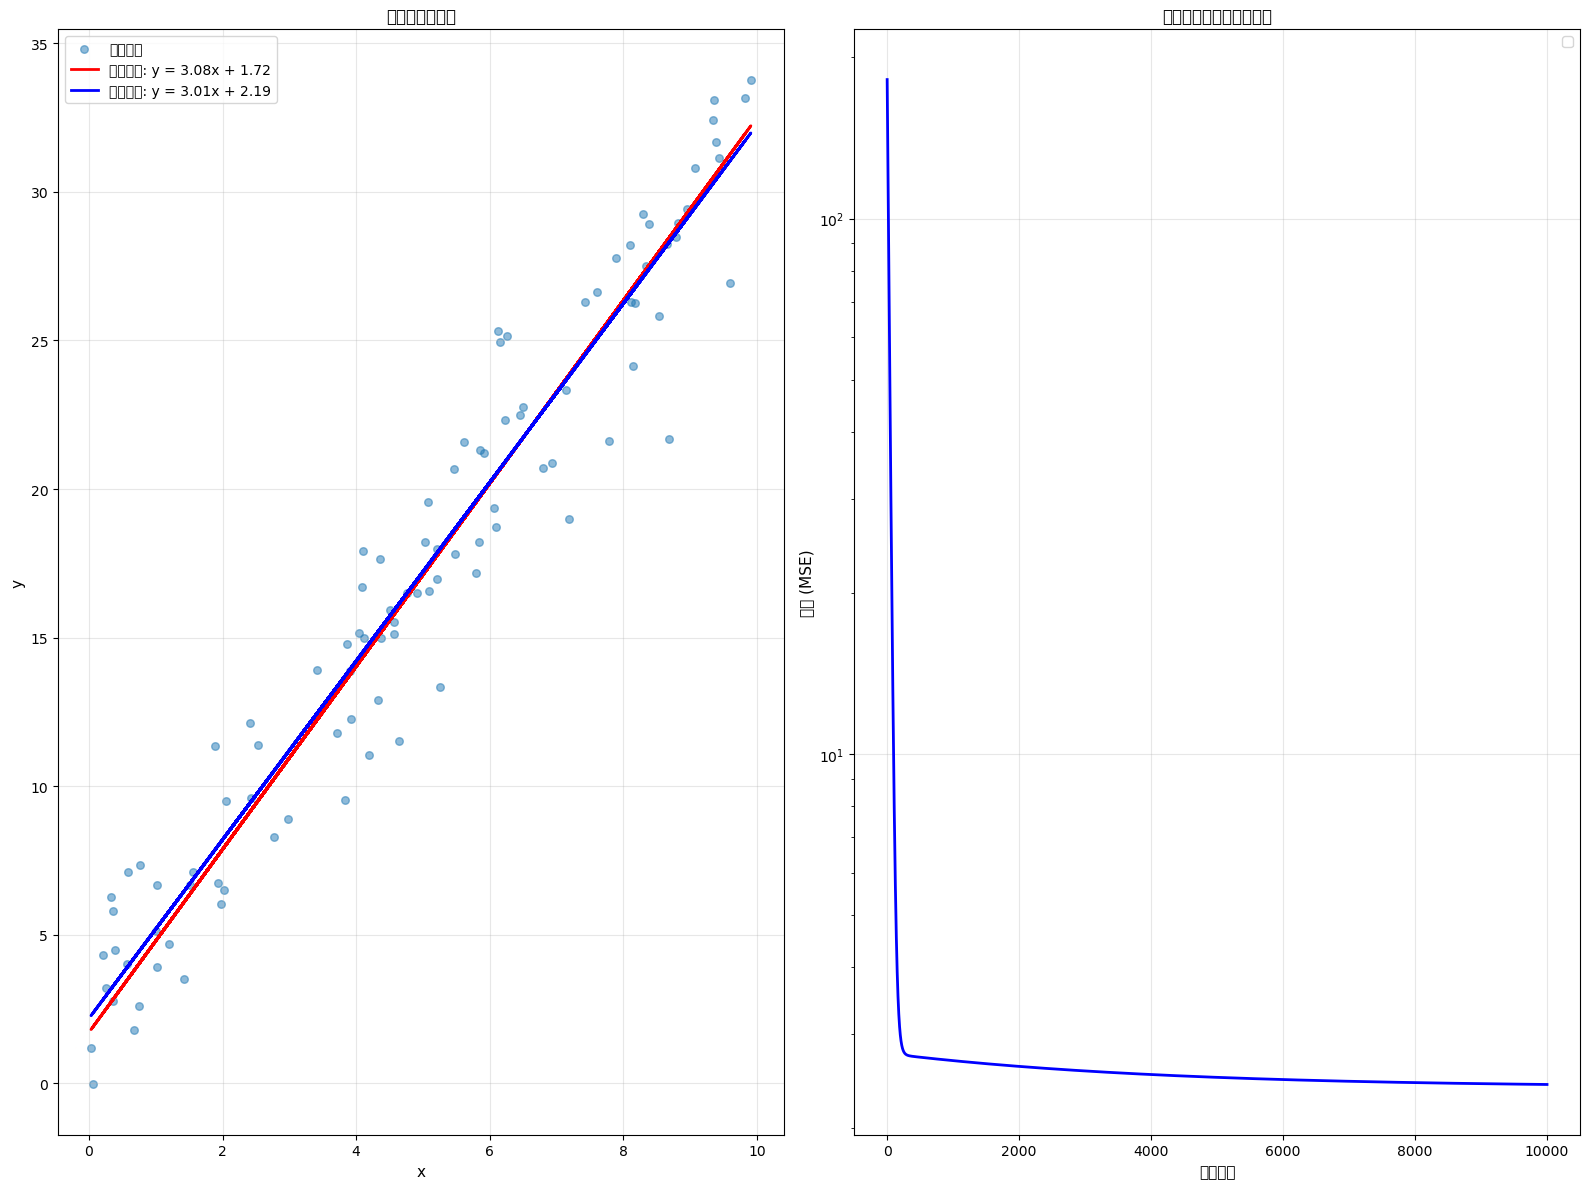

In [14]:
#| echo: true  # 顯示程式碼
#| output: true # 顯示輸出
#| warning: false    # 隱藏警告
#| fig-width: 10        # 以英吋為單位
#| fig-height: 6
#| fig-dpi: 150         # 較高解析度
#| fig-format: svg      # 向量圖，放大不失真（常用於簡報）
#| out-width: 100%      # 圖片在投影片佔滿寬度

#------------------------------
# Step 1: 生成訓練資料
#------------------------------
n_samples = 100

# 真實參數
true_a = 3.0
true_b = 2.0

# 生成資料
x = np.random.rand(n_samples) * 10
y = true_a * x + true_b + np.random.randn(n_samples) * 2

#------------------------------
# Step 2: 初始化參數
#------------------------------
a = 0.0  # 斜率
b = 0.0  # 截距

#------------------------------
# Step 3: 設定超參數
#------------------------------
num_iter = 10000        # 迭代次數
learning_rate = 5e-4    # 學習率
n_samples = len(x)      # 樣本數量

loss_history = []
#------------------------------
# Step 4: 梯度下降訓練
#------------------------------
for iter in range(num_iter):
    # 前向傳播
    y_pred = a * x + b


    # 計算損失函數 (MSE)
    loss = np.sum((y_pred - y) ** 2)/(2*n_samples)
    loss_history.append(loss)

    # 計算梯度
    da = (y_pred - y).dot(x) / n_samples
    db = (y_pred - y).sum() / n_samples

    # 更新參數
    a = a - learning_rate * da
    b = b - learning_rate * db

#------------------------------
# 正規方程求解
#------------------------------

# 擴充矩陣 X = [x, 1]
X_matrix = np.column_stack([x, np.ones(len(x))])

# 正規方程求解: w = (X^T X)^(-1) X^T y <=> X^+ y
theta = np.linalg.pinv(X_matrix) @ y
a_normal, b_normal = theta

#------------------------------
# Step 5: 輸出最終結果
#------------------------------
print("\n" + "="*50)
print(f"{'方法':<12} {'a 參數':<10} {'b 參數':<10}")
print("-" * 60)
print(f"{'梯度下降':<12} {a:<10.4f} {b:<10.4f}")
print(f"{'正規方程':<12} {a_normal:<10.4f} {b_normal:<10.4f}")
print(f"{'真實值':<12} {true_a:<10.4f} {true_b:<10.4f}")
print("="*60)

#------------------------------
# Step 6: 視覺化結果
#------------------------------
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].scatter(x, y, alpha=0.5, label='訓練資料', s=30)
axes[0].plot(x, a * x + b, 'r-', linewidth=2, label=f'梯度下降: y = {a:.2f}x + {b:.2f}')
axes[0].plot(x, a_normal * x + b_normal, 'b-', linewidth=2, label=f'正規方程: y = {a_normal:.2f}x + {b_normal:.2f}')
axes[0].set_xlabel('x', fontsize=11)
axes[0].set_ylabel('y', fontsize=11)
axes[0].set_title('梯度下降法結果', fontsize=12, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

axes[1].plot(loss_history, linewidth=2, color='blue')
axes[1].set_xlabel('迭代次數', fontsize=11)
axes[1].set_ylabel('損失 (MSE)', fontsize=11)
axes[1].set_title('訓練過程的損失函數變化', fontsize=12, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()


## 使用 Numpy 實現機器學習模型有兩個痛點

 - 需要手工求函數關於參數的偏導數

 如果是簡單的函數或許還好，但一旦函數的形式變得複雜（尤其是深度學習模型），手工求導的過程將變得非常痛苦，甚至不可行。

- 需要手工實現最佳化演算法

 這裏使用了最基礎的梯度下降方法，因此參數的更新還較為容易。但如果使用更加複雜的參數更新方法（例如 Adam 或者 Adagrad），這個更新過程的編寫同樣會非常繁雜。

而 Pytorch 等深度學習框架很大程度上解決了這些痛點，為機器/深度學習模型的實現帶來了很大的便利。

以下程式展示如何用 **PyTorch + 自動微分 (autograd)** 來實現 **梯度下降 (Gradient Descent)**，求解線性回歸的參數 $a, b$。

---

In [11]:
#| echo: true  # 顯示程式碼
#| output: true # 顯示輸出


# 將 x, y 轉換成 tensor
x_torch = torch.tensor(x)
y_torch = torch.tensor(y)

# 初使化變數
a_torch = torch.tensor(0.0, requires_grad=True)
b_torch = torch.tensor(0.0, requires_grad=True)

num_iter = 10000
learning_rate = 5e-4
for iter in range(num_iter):

    # forward
    y_pred = a_torch * x_torch + b_torch
    loss = torch.sum((y_pred - y_torch)**2)/(2*n_samples)

    # calculate derivatives
    da, db = torch.autograd.grad(loss, [a_torch, b_torch])

    # 更新參數
    with torch.no_grad(): # 更新參數時不要記錄
        a_torch -= learning_rate*da
        b_torch -= learning_rate*db


print('a_torch = ', a_torch.detach().numpy())
print('b_torch = ', b_torch.detach().numpy())

a_torch =  3.0415158
b_torch =  1.5286039


## 使用 PyTorch 的 `.backward()` 進行梯度計算與參數更新

前面我們使用 `torch.autograd.grad` 來手動取得偏導數。  
這裡我們展示另一種 **更常見的寫法**：利用 `loss.backward()` 自動計算梯度，並存在每個張量的 `.grad` 屬性中。


In [12]:
#| echo: true  # 顯示程式碼
#| output: true # 顯示輸出

# 初使化變數
a_torch = torch.tensor(0.0, requires_grad=True)
b_torch = torch.tensor(0.0, requires_grad=True)

num_iter = 10000
learning_rate = 5e-4
for iter in range(num_iter):

    # forward
    y_pred = a_torch * x_torch + b_torch
    loss = torch.sum((y_pred - y_torch)**2)/(2*n_samples)

    # zero grad
    if a_torch.grad is not None:
        a_torch.grad.zero_()
    if b_torch.grad is not None:
        b_torch.grad.zero_()

    # backward
    loss.backward() # <- 後向傳播另一種使用方式，會自動對 requared_grad=True 的參數進行求導
                    #    參數的導數存在 a.grad 和 b.grad

    # 更新參數
    with torch.no_grad():
        a_torch -= learning_rate * a_torch.grad
        b_torch -= learning_rate * b_torch.grad

print('a_torch = ', a_torch.detach().numpy())
print('b_torch = ', b_torch.detach().numpy())

a_torch =  3.0415158
b_torch =  1.5286039


---

在 Pytorch 中呼叫 `backward()`，其導數會被累加到參數的 `grad` 中。因此必須在每次訓練疊代中將梯度歸零。至於為什麼 Pytorch 不自動歸零，其官方說法是為了在更複雜的模型中有更大的彈性。

## 使用自動微分與 PyTorch Optimizer 進行線性迴歸

前面我們示範過：
1. 用 `autograd.grad` 手動取偏導並更新參數  
2. 用 `.backward()` + `.grad` 直接更新參數  

現在進一步，我們可以用 **PyTorch 提供的 Optimizer**，讓參數更新更簡潔。  
這也是 **訓練深度學習模型的標準流程**。

In [13]:
#| echo: true  # 顯示程式碼
#| output: true # 顯示輸出

# 初使化變數
a_torch = torch.tensor(0.0, requires_grad=True)
b_torch = torch.tensor(0.0, requires_grad=True)

num_iter = 10000
optimizer = torch.optim.SGD([a_torch, b_torch], lr=5e-4) # 定義一個 stochastic gradient descent 優化器

for iter in range(num_iter):

    # forward
    y_pred = a_torch * x_torch + b_torch
    loss = torch.sum((y_pred - y_torch)**2)/(2*n_samples)

    # backward
    optimizer.zero_grad() # <- 需在 backward() 之前呼叫
    loss.backward()

    # Pytorch 自動根據梯度更新參數
    optimizer.step()

print('a_torch = ', a_torch.detach().numpy())
print('b_torch = ', b_torch.detach().numpy())

a_torch =  3.0415158
b_torch =  1.5286039


## PyTorch 梯度下降三種方法比較

| 方法 | 特點 | 梯度計算 | 參數更新方式 | 適用場景 |
|------|------|----------|--------------|----------|
| **1. `torch.autograd.grad`** | 直接計算並回傳梯度 | `da, db = torch.autograd.grad(loss, [a, b])` | 手動寫更新規則：`a -= lr*da` | 學習公式、理解數學推導 |
| **2. `.backward()` + `.grad`** | 透過計算圖自動將梯度存入 `.grad` | `loss.backward()` → `a.grad, b.grad` | 手動寫更新規則：`a -= lr*a.grad` | 深度學習標準流程的基礎 |
| **3. Optimizer (`torch.optim`)** | 最高層級封裝，最簡潔 | `loss.backward()` 自動更新 `.grad` | `optimizer.step()` 自動更新 | 實際模型訓練（CNN, RNN, Transformer） |

---

### 小結
- `autograd.grad` → **數學練習**，了解梯度的來源  
- `.backward()` → **深度學習核心流程**  
- Optimizer → **實務訓練模型時必用**，支援多種優化方法（SGD, Adam, RMSProp …）  



透過線性回歸這個簡單案例，我們已經看到了 **深度學習訓練的基本流程**：

1. **Forward**：由輸入資料計算模型的輸出  
2. **Loss**：計算預測值與真實標籤的誤差  
3. **Backward**：利用自動微分計算梯度 (Gradient)  
4. **Update**：依照梯度與學習率更新參數 (Optimizer)  

```python

for iter in range(num_iter):
    # ---- Forward ----
    y_pred = model(x)               # 模型輸出
    loss = loss_fn(y_pred, y)       # 計算損失

    # ---- Backward ----
    optimizer.zero_grad()           # 清除舊梯度
    loss.backward()                 # 自動計算梯度

    # ---- Update ----
    optimizer.step()                # 更新參數

```

這四個步驟組成了「深度學習模型訓練的骨架」。  
不管模型多麼複雜（線性回歸、CNN、RNN、Transformer…），其核心流程都遵循這個框架。

---



## 小結：  
- 線性回歸是最簡單的深度學習模型  
- 梯度下降是模型訓練的基礎方法  
- Optimizer 將訓練流程自動化，讓我們能專注於設計更強大的網路結構
  
## 常見錯誤與陷阱

1. 梯度累積

   **症狀**：損失震盪或爆掉。

   **可能原因**：每次 `backward()` 會把梯度 加到 `param.grad`; 沒清空就會累加。
   
   **解法**：在每個 step 前 `optimizer.zero_grad()` 或 `for p in model.parameters(): p.grad = None`。